In [48]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm


# Log Transform 

In [5]:
np.random.seed(123) # seed fixed random numers 
data = np.random.lognormal(mean=2, sigma=1, size=1000)

In [10]:
df=pd.DataFrame({'data':data})

<AxesSubplot: ylabel='Density'>

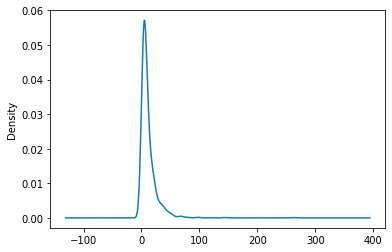

In [21]:
df.data.plot(kind='kde')

<AxesSubplot: xlabel='data', ylabel='Density'>

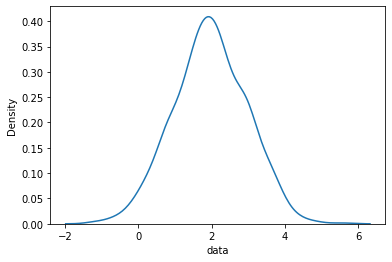

In [33]:
sns.kdeplot(np.log(df.data))

above graph seems little bit normal graph let's check it 

In [40]:
transformed_data=np.log1p(df.data)

In [43]:
print('skewness of transformed_data',transformed_data.skew())
print('skewness of orignal data',df.data.skew())

skewness of transformed_data 0.35794238443502746
skewness of orignal data 6.486932559322774


In [44]:
transformed_data.median()

2.0907420643296177

-- lets check with qq plot 

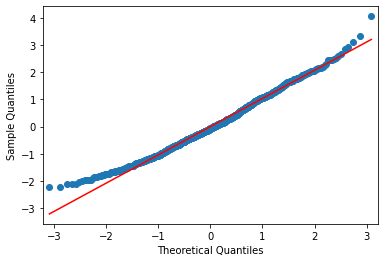

In [53]:
fig=sm.qqplot(transformed_data,fit=True,line='q')

# Sqrt Transform 

In [54]:
np.random.seed(123)
data = np.random.exponential(scale=10, size=1000)

# create a DataFrame from the data
df = pd.DataFrame({'data': data})

<AxesSubplot: xlabel='data', ylabel='Density'>

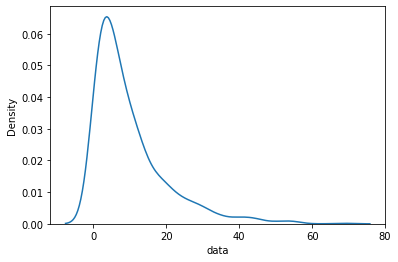

In [69]:
sns.kdeplot(df.data)

In [59]:
(df.data<0).sum()

0

In [63]:
transform_data=df.data**2

<AxesSubplot: xlabel='data', ylabel='Density'>

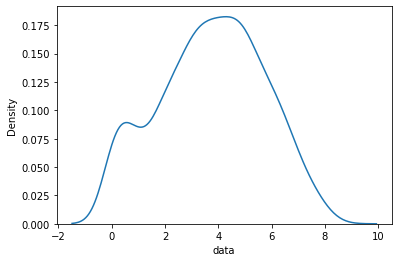

In [66]:
sns.kdeplot(np.log1p(transform_data))

In [68]:
df.max()

data    68.293194
dtype: float64


The dataset we will use is the House Prices: Advanced Regression Techniques dataset, which contains information about 79 features of residential homes in Ames, Iowa. The goal is to predict the sale price of each house. You can find the dataset here: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Question 1: Which feature has the highest skewness in the original dataset? How can you check the skewness of a feature?

Answer: The feature with the highest skewness in the original dataset is SalePrice, with a skewness of 1.88. You can check the skewness of a feature by using the skew() method from pandas or scipy.stats.

Question 2: How can you apply log transformation to SalePrice? What is the new skewness of SalePrice after log transformation?

Answer: You can apply log transformation to SalePrice by using the np.log1p() function from numpy, which adds 1 to the value before taking the logarithm. This avoids taking the logarithm of zero or negative values. The new skewness of SalePrice after log transformation is 0.12, which is much closer to zero and indicates a more symmetric distribution.

Question 3: Which other features have high skewness in the original dataset? How can you apply log transformation to multiple features at once?

Answer: Some other features that have high skewness in the original dataset are LotArea (12.2), PoolArea (16.9), MiscVal (24.5), and LowQualFinSF (12.1). You can apply log transformation to multiple features at once by using a loop or a list comprehension. For example, you can use the following code to transform all numerical features with skewness greater than 0.75:

skewed_feats = df_train[numerical_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
df_train[skewed_feats] = np.log1p(df_train[skewed_feats])

Question 4: How can you visualize the effect of log transformation on a feature? What kind of plot can you use?

Answer: You can visualize the effect of log transformation on a feature by plotting its histogram or density plot before and after transformation. You can also use a boxplot or a Q-Q plot to compare the distribution with a normal distribution. For example, you can use the following code to plot the histogram and Q-Q plot of SalePrice before and after log transformation:

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df_train['SalePrice'], kde=True, ax=ax[0, 0])
stats.probplot(df_train['SalePrice'], plot=ax[0, 1])
sns.histplot(df_train['SalePrice_log'], kde=True, ax=ax[1, 0])
stats.probplot(df_train['SalePrice_log'], plot=ax[1, 1])
plt.show()

Question 5: How can you evaluate the performance of a linear regression model with and without log transformation? What metric can you use?

Answer: You can evaluate the performance of a linear regression model with and without log transformation by using cross-validation and comparing the mean squared error (MSE) or root mean squared error (RMSE) of the predictions. However, since we transformed the target variable SalePrice, we need to transform it back to its original scale before computing the MSE or RMSE. We can do this by using np.expm1() function from numpy, which subtracts 1 from the value before taking the exponential. For example, you can use the following code to evaluate a linear regression model with and without log transformation:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)
print('RMSE without log transformation:', rmse_scores.mean())

y_train_log = np.log1p(y_train)
scores_log = cross_val_score(lr, X_train, y_train_log, scoring='neg_mean_squared_error', cv=5)
rmse_scores_log = np.sqrt(-

# Log-Tranformation problems

Question 1: Which feature has the highest skewness in the original dataset? How can you check the skewness of a feature?

In [71]:
df=pd.read_csv('sample_submission.csv')

we can you check the skewness of a feature

In [73]:
# by directly using skew function
df.SalePrice.skew()

0.9293599840715666

<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

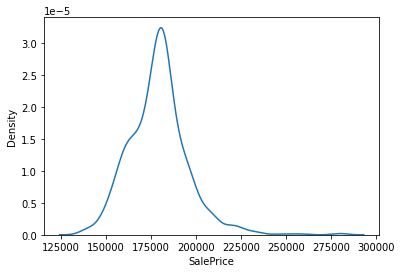

In [75]:
sns.kdeplot(df.SalePrice)

In [77]:
df.SalePrice

0       169277.052498
1       187758.393989
2       183583.683570
3       179317.477511
4       150730.079977
            ...      
1454    167081.220949
1455    164788.778231
1456    219222.423400
1457    184924.279659
1458    187741.866657
Name: SalePrice, Length: 1459, dtype: float64

<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

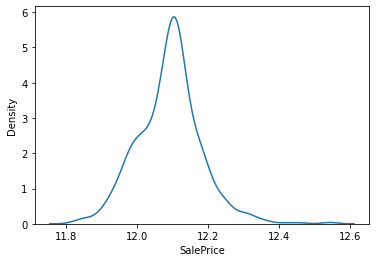

In [81]:
sns.kdeplot(np.log1p(df.SalePrice))

In [82]:
np.log1p(df.SalePrice).skew()

0.3788535896881285